# Transient flow
*Prof. dr.ir. T.N.Olsthoorn*

*Heemstede, Oct. 2016*

## Theory

Transient flow, in fact, requires a relatively straightforward extension of our steady-state model fdm3. The water balance equation for an arbitrary single cell in our model becomes:

$$ \intop_t^{t+\Delta t}\left( \sum Q_{in} + Q_{ext} \right) dt = W_{t+\Delta t} - W_t $$ 

The the left side of the equation describes the total net inflow for this cell, divided in a sum that originates from the surrounding cells and the $ Q_{ext} $ denotes the total net inflow from the outside world (Injection, Recharge, Leakage etc.). It's clear that extractions are counted as negative injections. This total net inflow shoul be integrated over the considered time spand, i.e. $ t \rightarrow t + \Delta t $, during which the flows may vary in arbitrary ways. To the right we have the volume of water in the cell at the end of this period minus that at the start of this period. There is no approximation in this equation.

When it comes to our model, we will write the right hand side in terms of volume, storage coefficient $ S_S $, and head $ h $. The integral to the left is dropped by writing for the flow their average values during the considered period:

$$  \left( \sum \overline{Q}_{in} + \overline{Q}_{ext} \right) \Delta t 
= S_S V  \left( h_{t+\Delta t} - h_t \right)
$$ 

where

$$ V = \Delta x \Delta y \Delta z $$

the volume of the cell.

As we saw in an earlier chapter where we derived the finite differenc method, the flow from each neighbor indexed $ j $ into the considered cell with index $ i $ is formulated as

$$ Q_{ji} = C_{ij} (h_j - h_i) $$ 

Thus, $ Q $ varies during the time step according to how the heads vary. The question then is, which $ h $ is the true average during the time step, such that, then it is used, we get the average flows during the time step and hence we can integrate by multiplying with $ \Delta t $.

The answer is, we don't know. We only know for sure, that there exists some value of $ 0< \epsilon < 1$ such that

$$ Q_{t + \epsilon \Delta t } = \overline{Q} $$

But then, if we solve the system of equation, we wil end up with the head for this time, $ h_{t + \epsilon \Delta t} $, which definitely differs from the head at the end of the time step, which we need to compute the storage during the time step as expressed in the equation above.

To solve this dilemma, we have to make an assumption, which is, that we assume that the time steps of our simulation are small enough to safely approximate the change of head during them as being linear. With this approximation, we have

$$ h_{t+\epsilon \Delta t} = h_t + \epsilon (h_{t + \Delta t} - h_t) $$

or

$$ h_{t + \Delta t} = h_t + \frac { h_{t + \epsilon \Delta t} - h_t } \epsilon $$

This implies that we can now replace the unknown head at the end of the time step by the one we actually compute during the time step, by writing

$$  \left( \sum \overline{Q}_{in} + \overline{Q}_{ext} \right)_{t=t+\epsilon \Delta t}  
= S_S \frac V {\epsilon \Delta t}  \left( h_{t+ \epsilon \Delta t} - h_t \right)
$$ 

If we just realize that all flows and heads will be compute that $ t + \epsilon \Delta t $, we can omit this index and write and reorder keeping the unknown $ Q_{in} $ to the left and putting all known $ Q_{ext} $ to the right, positive when entering the cell, we obtain:

$$  - \sum Q_{in} = Q_{ext} -  S_S \frac V {\epsilon \Delta t}  \left( h - h_t \right)
$$ 

We see that $ h_t $ is known, because it is the head in the considered cell at the beginning of the considered time step, i.e. at the end of the last time step. Therefore, we can rearrange to have all known values to the right of the equal sign and all unknowns at the left. This gives

$$  - \sum Q_{in} + S_S \frac V {\epsilon \Delta t} h = Q_{ext} +  S_S \frac V {\epsilon \Delta t}  h_t
$$


Just remember that the first term, $ -\sum Q_{in} $ can be written out as a vector product, this becomes

$$
\left[
\begin{array}{cccc}
-C_E, & \ldots & -C_B, & + \left( C_E + \ldots + C_B \right)
\end{array}
\right]
\left[
\begin{array}{c}
h_E \\ h_W \\ h_N \\ h_S \\ h_T \\ h_B \\ h
\end{array}
\right]
+ S_S \frac V {\epsilon \Delta t} h = Q_{ext} +  S_S \frac V {\epsilon \Delta t}  h_t
$$

To bring the right-most term of the left-hand side of this equation under the vector product, we only have to put the the factor in front of $ h $ to the sum of coefficients like so:

$$
\left[
\begin{array}{cccc}
-C_E, & \ldots & -C_B, & + \left( C_E + \ldots + C_B + S_S \frac V {\epsilon \Delta t} \right)
\end{array}
\right]
\left[
\begin{array}{c}
h_E \\ h_W \\ h_N \\ h_S \\ h_T \\ h_B \\ h
\end{array}
\right]
 = Q_{ext} +  S_S \frac V {\epsilon \Delta t}  h_t
$$


We see that we have now a water balance equation for the transient cell that has exactly the same structure as the one we developed for the steady-state case, with unknowns at the left and the known flows on the right. Notice that the second term to the right has the same dimension as $Q_{ext} $, namely [L3/T]. The include the storage due to the unknown head, it suffices to put the coefficient $ S_S V / (\epsilon \Delta t) $ in the coefficient of the requested node to the left. It doesn't change any of the other coefficients.

If we compare this with the first chapter, in which it was shown how exchange between model and a fixed head in the outside world through resistance was implemented, we see that it's the same with implementation of transient flow. The conducntace is added to the matrix coefficient on the left, while the known part C_{ext}h_{ext} is kept on the right side, and it too has dimension [L3/T].

Consedering the entire model, we have such an equation for each and every cell in it. These equations are combined into a system of equations

$$ \mathbf{A} \times \mathbf{h}_{t+\epsilon \Delta t} = \overline{\mathbf{Q}}_{ext} +
\mathbf{S}_S \frac {\mathbf{V}} {\epsilon \Delta t} \mathbf{h}_t $$

Where \matbh{A} is the system matrix, in which the coefficient vector $ \mathbf{S}_S \mathbf{V}/(\epsilon \Delta t) $ was added to its diagonal.

It is clear that these coefficents change with the lenght of the time step and, therefore the diagonal and the right-hand side of the equation have to be adapted with each new time step, if its length changes.

The dealing with fixed heads does not change and was explained earlier in the chaper "finite differnce modeling".

The answer that we obtain after having solved the system equation, is the head in all cells at time $ t + \epsilon \Delta t $. Therefore we a small extra step to obtain the head $ h_{t + \Delta t} $ at the end of the time step

$$ \mathbf{h}_{t+\Delta t} = \mathbf{h}_t + \frac { \mathbf{h}_{t + \epsilon \Delta t} - \mathbf{h}_t} \epsilon $$


The only point that we have still circumvented is the choice of $ 0\epsilon<1 $, the so called implicitness. It is the point in time expressed as the fraction of the current time-step length at which the flows and heads represent the average values during the entire time step. In fact, we don't know. If the head change is linear, then $ \epsilon=0.5 $ would be exact. But when the head exponentially appoaches a new equilibrium a value $ \epsilon > 0.5 $ is better. Not only because heads will always thrive to a new equilibrium with time, but also because values of $ \epsilon<0.5 $ yield unstable solutions, we always choose a value larger than 0.5. The most drastic choice is $\epsilon = 1$, a choice which is said to make the model fully implicit. It conceptually assumes that the heads at the end of the current timestep well represent their average values during the time step. It may not be the most accurate value, especially with larger time steps, but it makes the model rock stable. In fact this is the choice that the world's most used finite difference model, MODFLOW, implicitly makes.

Is it a good or a bad choice? Well it's not bad as errors due to this time discretization well damp out during subsequent time steps. Nevertheless, we will keep the value of $ \epsilon $ explicit, so as to allow investigating the sensitivity of the outcomes of the model for it.

 ## Procedure
 
We compute the required coefficients for each time step as follows:

Compute

for non-axially symmetric models:

$$ \mathbf{C}_S = \frac {\mathbf{S}_S \mathbf{\Delta x \Delta y \Delta z}} {\epsilon \Delta t} $$

for axially symmetric models:

$$ \mathbf{C}_S = \frac {\mathbf{S}_S  \pi \left( \mathbf{x}[1:]^2 - \mathbf{x}[:-1]^2 \right) \Delta z } {\epsilon \Delta t} $$

Add this vector $ \mathbf{C}_S $ explicitly to the diagonal of the system matrix at each time step.

Compute

$$ \mathbf{C}_S \mathbf{h}_t $$

at the RHS of the system equation for each time step.

We solve for $ \mathbf{h}_{t + \epsilon \Delta t} $

$$
\mathbf{h}_{t+\epsilon \Delta t} = \mathbf{A}^{-1} \times \left( \mathbf{Q}_{ext} +
\mathbf{C}_S  \mathbf{h}_t \right)
$$

Finally compute

$$ \mathbf{h}_{t+\Delta t} = \mathbf{h}_t + \frac {\mathbf{h}_{t + \epsilon \Delta t} - \mathbf{h}_t } \epsilon $$

And just before computing the new time step, update the know $\mathbf{h}_t$ with the value just computed

$$ \mathbf{h}_t = \mathbf{h}_{t+\Delta_t} $$

## Implementation

We have to adapt our fdm3 model at a few places. First is its signature. We need two extra inputs, namely $t$ and $ \mathbf{S}_S and a possibility to adapt the implicitness $ \epsilon $. Calling this model `fdm3t` we have

Out = fdm3t(gr, t, kx, ky, kz, Ss, FQ, FH, IBOUND, epsilon=0.67)

Where the output Out contains the computed arrays, see doc string of implementation below.

The heads are at the end of the time steps not including the intial heads.
The flows [L3/T] are average flows during each time step.

All these array are, therefore, 4 dimensional, 3 spacial dimensions and and the fourth being time. The shape of the heads, $ Q $ and $ Qs $ arrays are, therore, $ (Ny, Nx, Nz, Nt) $

The new $ Qs $ is the flow [m3/T] during the time step that enters the cell from storage (because all flows are positive when they enter a cell). Thus $Qs$ is positive when the head declines, yielding water from storage to the cell that then flows towards surrounding cells (or to the external world). 

We only use the specific storage of each cell. This can be easily computed from the total storage and even from the specific yield when required.

What we have not (yet) implemented are non-lineairities like change of transmissivity of the model and, therefore, its cells under transient unconfined conditions. To do this is not difficult. It requires updating the transmissivities of the cells after a given number of so-called inner iterations. Each such adaptation is called an outer iterations. Once the head and or flow changes after an out iterations have become negligible, the model is said to have converged and the outcomes are used. Notice, however, that convergence is not always guaranteed for non-linear systems that are solved in terms of linear equations that are updated like it is done here as well as in MODFLOW. Special solvers can do a better job by adding non-linear Newton-Raphson schemes to the solver. MODFLOW.NWT and the new MODFLOW.USG have such a solver, which may be necessary for strongly non-linear models. These issues are beyond this course.

## Implementation; the adepted module to include axial symmetry

In [1]:
%%writefile fdm_t.py

import numpy as np
import pdb
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve # to use its short name
from collections import namedtuple

class InputError(Exception):
    pass

def unique(x, tol=0.0001):
    """return sorted unique values of x, keeping ascending or descending direction"""
    if x[0]>x[-1]:  # vector is reversed
        x = np.sort(x)[::-1]  # sort and reverse
        return x[np.hstack((np.diff(x) < -tol, True))]
    else:
        x = np.sort(x)
        return x[np.hstack((np.diff(x) > +tol, True))]

    
def fdm3t(gr, t, kx, ky, kz, Ss, FQ, HI, IBOUND, epsilon=0.67):
    '''Transient 3D Finite Difference Model returning computed heads and flows.
        
    Heads and flows are returned as 3D arrays as specified under output parmeters.
    
    Parameters
    ----------
    'gr' : `grid_object`, generated by gr = Grid(x, y, z, ..)
        if `gr.axial`==True, then the model is run in axially symmetric model
    t : ndarray, shape: [Nt+1]
        times at which the heads and flows are desired including the start time,
        which is usually zero, but can have any value.
    `kx`, `ky`, `kz` : ndarray, shape: (Ny, Nx, Nz), [L/T]
        hydraulic conductivities along the three axes, 3D arrays.
    `Ss` : ndarray, shape: (Ny, Nx, Nz), [L-1]
        specific elastic storage
    `FQ` : ndarray, shape: (Ny, Nx, Nz), [L3/T]
        prescrived cell flows (injection positive, zero of no inflow/outflow)
    `IH` : ndarray, shape: (Ny, Nx, Nz), [L]
        initial heads. `IH` has the prescribed heads for the cells with prescribed head.
    `IBOUND` : ndarray, shape: (Ny, Nx, Nz) of int
        boundary array like in MODFLOW with values denoting
        * IBOUND>0  the head in the corresponding cells will be computed
        * IBOUND=0  cells are inactive, will be given value NaN
        * IBOUND<0  coresponding cells have prescribed head
    `epsilon` : float, dimension [-]
        degree of implicitness, choose value between 0.5 and 1.0
    
    outputs
    -------    
    `Out` : namedtuple containing heads and flows:
        `Out.Phi` : ndarray, shape: (Nt+1, Ny, Nx, Nz), [L3/T] 
            computed heads. Inactive cells will have NaNs
            To get heads at time t[i], use Out.Phi[i]
            Out.Phi[0] = initial heads
        `Out.Q`   : ndarray, shape: (Nt, Ny, Nx, Nz), [L3/T]
            net inflow in all cells during time step, inactive cells have 0
            Q during time step i, use Out.Q[i]
        `Out.Qs`  : ndarray, shape: (Nt, Ny, Nx, Nz), [L3/T]
            release from storage during time step.
        `Out.Qx   : ndarray, shape: (Nt, Ny, Nx-1, Nz), [L3/T] 
            intercell flows in x-direction (parallel to the rows)
        `Out.Qy`  : ndarray, shape: (Nt, Ny-1, Nx, Nz), [L3/T] 
            intercell flows in y-direction (parallel to the columns)
        `Out.Qz`  : ndarray, shape: (Nt, Ny, Nx, Nz-1), [L3/T] 
            intercell flows in z-direction (vertially upward postitive)        
    
    TO 161024
    '''

    import pdb
    
    # define the named tuple to hold all the output of the model fdm3
    Out = namedtuple('Out',['t', 'Phi', 'Q', 'Qs', 'Qx', 'Qy', 'Qz'])
    Out.__doc__ = """fdm3 output, <namedtuple>, containing fields `t`, `Phi`, `Q`, `Qs`, `Qx`, `Qy` and `Qz`\n \
                    Use Out.Phi, Out.Q, Out.Qx, Out.Qy and Out.Qz
                    or
                    Out.Phi[i] for the 3D heads of time `i`
                    Out.Q[i] for the 3D flows of time step `i`
                    Notice the difference between time and time step
                    The shape of Phi is (Nt + 1,Ny, Nx, Nz)
                    The shape of Q, Qs is (Nt, Ny, Nx, Nz)
                    For the other shapes see docstring of fdm_t                    
                    """                            
                                
    if gr.axial:
        print('Running in axial mode, y-values are ignored.')

    if kx.shape != gr.shape:
        raise AssertionError("shape of kx {0} differs from that of model {1}".format(kx.shape,gr.shape))
    if ky.shape != gr.shape:
        raise AssertionError("shape of ky {0} differs from that of model {1}".format(ky.shape,gr.shape))
    if kz.shape != gr.shape:
        raise AssertionError("shape of kz {0} differs from that of model {1}".format(kz.shape,gr.shape))
    if Ss.shape != gr.shape:
        raise AssertionError("shape of Ss {0} differs from that of model {1}".format(Ss.shape,gr.shape))
    
    active = (IBOUND>0).reshape(gr.Nod,)  # boolean vector denoting the active cells
    inact  = (IBOUND==0).reshape(gr.Nod,) # boolean vector denoting inacive cells
    fxhd   = (IBOUND<0).reshape(gr.Nod,)  # boolean vector denoting fixed-head cells

    # reshaping shorthands
    dx = np.reshape(gr.dx, (1, gr.Nx, 1))
    dy = np.reshape(gr.dy, (gr.Ny, 1, 1))

    # half cell flow resistances
    if not gr.axial:
        Rx1 = 0.5 *    dx / (   dy * gr.DZ) / kx
        Rx2 = Rx1
        Ry1 = 0.5 *    dy / (gr.DZ *    dx) / ky
        Rz1 = 0.5 * gr.DZ / (   dx *    dy) / kz
    else:
        # prevent div by zero warning in next line; has not effect because x[0] is not used 
        x = gr.x.copy();  x[0] = x[0] if x[0]>0 else 0.1* x[1]
        
        Rx1 = 1 / (2 * np.pi * kx * gr.DZ) * np.log(x[1:] /  gr.xm).reshape((1, gr.Nx, 1))
        Rx2 = 1 / (2 * np.pi * kx * gr.DZ) * np.log(gr.xm / x[:-1]).reshape((1, gr.Nx, 1))
        Ry1 = np.inf * np.ones(gr.shape)
        Rz1 = 0.5 * gr.DZ / (np.pi * (gr.x[1:]**2 - gr.x[:-1]**2).reshape((1, gr.Nx, 1)) * kz)
    
    # set flow resistance in inactive cells to infinite
    Rx1[inact.reshape(gr.shape)] = np.inf
    Rx2[inact.reshape(gr.shape)] = np.inf
    Ry1[inact.reshape(gr.shape)] = np.inf
    Ry2 = Ry1
    Rz1[inact.reshape(gr.shape)] = np.inf
    Rz2 = Rz1
    
    # conductances between adjacent cells
    Cx = 1 / (Rx1[ :,1:,:] + Rx2[:,:-1,:])        
    Cy = 1 / (Ry1[:-1,:,:] + Ry2[ 1:,:,:])
    Cz = 1 / (Rz1[:,:,:-1] + Rz2[:,:, 1:])

    # storage term, variable dt not included
    Cs = (Ss * gr.Volume / epsilon).ravel()
        
    # cell number of neighboring cells
    IE = gr.NOD[:,1:,:]  # east neighbor cell numbers
    IW = gr.NOD[:,:-1,:] # west neighbor cell numbers
    IN = gr.NOD[:-1,:,:] # north neighbor cell numbers
    IS = gr.NOD[1:,:,:]  # south neighbor cell numbers
    IT = gr.NOD[:,:,:-1] # top neighbor cell numbers
    IB = gr.NOD[:,:,1:]  # bottom neighbor cell numbers
    
    R = lambda x : x.ravel()  # generate anonymous function R(x) as shorthand for x.ravel()
    
    # notice the call  csc_matrix( (data, (rowind, coind) ), (M,N))  tuple within tupple
    # also notice that Cij = negative but that Cii will be postive, namely -sum(Cij)
    A = sp.csc_matrix(( np.concatenate(( R(Cx), R(Cx), R(Cy), R(Cy), R(Cz), R(Cz)) ),\
                        (np.concatenate(( R(IE), R(IW), R(IN), R(IS), R(IB), R(IT)) ),\
                         np.concatenate(( R(IW), R(IE), R(IS), R(IN), R(IT), R(IB)) ),\
                      )),(gr.Nod,gr.Nod))

    A = -A + sp.diags( np.array(A.sum(axis=1)).ravel() ) # Change sign and add diagonal
   
    #Initialize output arrays (= memory allocation)
    Nt = len(t)-1
    Out.Phi = np.zeros((Nt+1, gr.Nod)) # Nt+1 times
    Out.Q   = np.zeros((Nt  , gr.Nod)) # Nt time steps
    Out.Qs  = np.zeros((Nt  , gr.Nod))
    Out.Qx  = np.zeros((Nt, gr.Ny, gr.Nx-1, gr.Nz))
    Out.Qy  = np.zeros((Nt, gr.Ny-1, gr.Nx, gr.Nz))
    Out.Qz  = np.zeros((Nt, gr.Ny, gr.Nx, gr.Nz-1))
    
    # reshape input arrays to vectors for use in system equation
    FQ = R(FQ);  HI = R(HI);  Cs = R(Cs)
    
    # initialize heads
    Out.Phi[0] = HI
    
    # solve heads at active locations at t_i+eps*dt_i
    
    Nt=len(t)  # for heads, at all times Phi at t[0] = initial head
    Ndt=len(np.diff(t)) # for flows, average within time step
    
    for idt, dt in enumerate(np.diff(t)):
        
        it = idt+1 
        
        # this A is not complete !!
        RHS = FQ - (A + sp.diags(Cs / dt))[:,fxhd].dot(Out.Phi[it-1][fxhd]) # Right-hand side vector

        Out.Phi[it][active] = spsolve( (A + sp.diags(Cs / dt))[active][:,active],
                                  RHS[active] + Cs[active] / dt * Out.Phi[it-1][active])
    
        # net cell inflow
        Out.Q[idt]  = A.dot(Out.Phi[it])

        Out.Qs[idt] = -Cs/dt * (Out.Phi[it]-Out.Phi[it-1])


        #Flows across cell faces
        Out.Qx[idt] =  -np.diff( Out.Phi[it].reshape(gr.shape), axis=1) * Cx
        Out.Qy[idt] =  +np.diff( Out.Phi[it].reshape(gr.shape), axis=0) * Cy
        Out.Qz[idt] =  +np.diff( Out.Phi[it].reshape(gr.shape), axis=2) * Cz

        # update head to end of time step
        Out.Phi[it] = Out.Phi[it-1] + (Out.Phi[it]-Out.Phi[it-1])/epsilon

    # reshape Phi to shape of grid
    Out.Phi = Out.Phi.reshape((Nt,) + gr.shape)
    Out.Q   = Out.Q.reshape( (Ndt,) + gr.shape)
    Out.Qs  = Out.Qs.reshape((Ndt,) + gr.shape)

    return Out # all outputs in a named tuple for easy access

Overwriting fdm_t.py


## Examples

Here we'll work out a few axially symmetric examples to verify this model using analytical solutions.


We will also compute the darwdown in a multi-layer aquifer system.

We'll keep truly axially symmetric 3D flow for the next chapter, after we introduced the stream function.

### Preparatory work

As always we set the path to our own modules and import the required modules and general packages.

Each time after we edited one or more of our modules, we have to `reload` them. This is why `reload` is imported.

In [6]:
myModules = './modules/'

#Adding the path to our modules to the pythonpath
import sys
if not myModules in sys.path:
    sys.path.append(myModules)

In [7]:
# import the required general packages
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import fdm_t   # first time import
reload(fdm_t)  # in case we edited fdm_t above we need to reload

# allow inline plotting
%matplotlib notebook

In [8]:
# import our own modules and packages, when they exist
import fdm_t # from current directory
import mfgrid  # path has been added to sys.path above
import mfetc
import mfexceptions as err

In [9]:
# when we have been editing files, make sure to reload
reload(fdm_t)
reload(mfgrid)
reload(mfetc)
reload(err)

<module 'mfexceptions' from '/Users/Theo/GRWMODELS/Python_projects/FDM_course/mfexceptions.py'>

### A well in a confined (or unconfined) infinite aquifer (Theis)

The most famous analytic transient groundwater solution is that of the Theis well, a fully penetrating well in a homogeneous confined aquifer, that starts pumping at a constant rate at t=0. We will now use our model in axially symmetric mode to compute this drawdown numerically and compare it with the analytical solution.

The analytical solution of the drawdown $s$ Theis well reads

$$ s = \frac Q {4 \pi kD} W(u), \,\,\,\, u = \frac {r^2 S} { 4 kD t} $$

$W(-)$ is called the Theis well function. It is a regular mathematical function known at the `exponential integral`

$$ W(u) = \intop_u^\infty \frac {e^{-y}} y dy $$

This exponential integral is available in Python as

from scipy.special import expi, defined as

$$ expi(w) = \intop_{-\infty}^w \frac {e^{\nu}} \nu d\nu $$

To convert the `Well` function `w` to the `expi` function as defined in Python.


$$
W(u) =\intop_{y=u}^{y=\infty} \frac {e^{-y}} y dy
=  \intop_{\nu=-\infty}^{\nu=-u} \frac {e^\nu} \nu d\nu
= \intop_{y=\infty}^{y=w} \frac {e^y} y dy
= expi(w) = expi(-u)
$$

Which allows us to just use `expi(-u)` for the analytical solution. It may practially be implemented by defining an anonymous function (lambda function or marco) as follows:

W = lambda u: scipy.linalg.expi(-u)

In [13]:
from scipy.special import expi
def W(u): return -expi(-u)
W(0.01) # check if it works

4.0379295765381134

Running in axial mode, y-values are ignored.


<IPython.core.display.Javascript object>


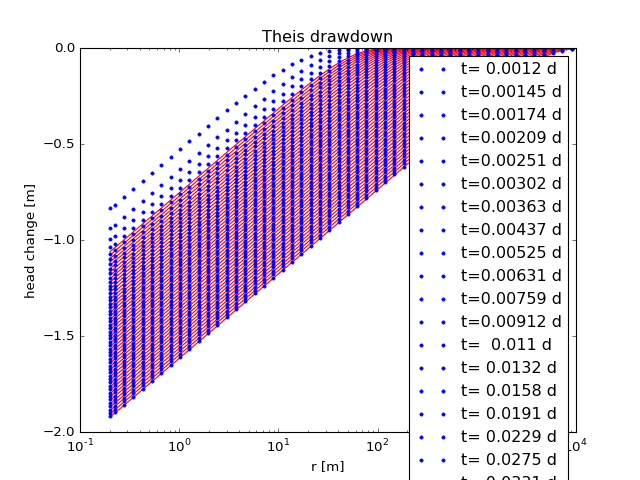

In [14]:
#aquifer
c = 250. # d, vertical hydraulic resistance of the confining unit
k =  20. # m/d, horizontal hydraulic conductivity of the aquifer
D =  50. # m, thickness of teh aquifer
S = 0.001 # -, elastic storage coefficient of aquifer
ss = S/D # 1/m, speciic elastic storage coefficient
kD = k*D # m2/d, transmissivity
Q = 1200 # m3/d, extraction by well (we use -Q for extraction in model)
t = np.logspace(-3.,1.,51)
Nt = len(t)
Ndt = len(np.diff(t))

r0 = 0.2 # m, radius of the well
R  = 1e4 # m, extent of model, analytic solution had not external boundary

z = np.array([0, -D])
y = np.array([-0.5, 0.5])  # m, a one m thick model (ignored when axially symmetric)
x = np.hstack((0.999*r0, np.logspace(np.log10(r0), np.log10(R), 51)))

gr = mfgrid.Grid(x, y, z, axial=True)

K  = gr.const(k)
Ss = gr.const(ss)
FQ = gr.const(0.);  FQ[0][0] = -Q
FH = gr.const(0.)
IBOUND = gr.const(1) # no fixed heads

Out = fdm_t.fdm3t(gr, t, K, K, K, Ss, FQ, FH, IBOUND, epsilon=1.0)

# analytical stuff
import scipy
W = lambda u: -scipy.special.expi(-u)

u = (gr.xm**2 * S).reshape((1,gr.Nx)) / (4 * kD *t.reshape((Nt,1)))
fi = -Q / (4 * np.pi * kD ) * W(u)

# show results
plt.figure()
plt.setp(plt.gca(),'xscale','log')
plt.xlabel('r [m]')
plt.ylabel('head change [m]')
plt.title('Theis drawdown')

for it in range(1,Nt):
    plt.plot(gr.xm, fi[it], 'r')
    plt.plot(gr.xm, Out.Phi[it][0,:,-1], 'b.', label='t={0:7.3g} d'.format(t[it]))
plt.legend()

The results show that the numerical model is accurate, except for the first two or three time steps and for the last few steps.

The error with the last few steps is obvious: out model is too small, causing the drawdown to bounce back from the closed outer boundary which as as effect an increased drawdown. As an exercise increas the outer boundary (by increasing the variable $R$) to see this.

One can compute the are of influence, that is the distance where the straigt drawdown line on log scale (as in the figure) hits zero. It can be derived from the analytical simplified solution of the logarithmic approximation of the Theis drawdown, which is

$$ s \approx \frac Q {4 \pi kD } \ln \left( \frac {2.25 kD t} {r^2 S }\right) $$

which, of course, is zero for  when the argument of the logarithm equals 1. This yields an expression for the radius of influence $ r_{inf} $

$$  r_{inf}  =\sqrt{ \frac {2.25 kD t} S } $$

which in our case is $ r_{inf} (t=1000 d) = 15000 m = 15 km $, while our model radius is only 10 km. The problem is solved by setting $R=1e5$ m (100 km).

The deviations shortly after the start of the pomp are due to an our inaccurate initial head. We used zero, indeed, but hile this sounds correct, it is not optimal for this case. The best choice is to use the analytical solution for the first time (which then has to be > 0), and start the model from there. When we do this, the drawdown will match from the first to the last step. If we, however, obstinentely start with all heads equal to zero, then the model needs about 3 steps to get into line with the analytical solution, no matter how short the initial time step that we start with. But with this in mind, the analytical and numerical results coincide pratically perfectly.

In real cases, the start of the full extraction exactly at t=0 is physically impossible anyway, due to fact that both the pump and the water have to be accellerate initially, which takes perhaps a minute.


### Well in the center of a circular island

We will now compute the same extraction using full fledged 2D spacial flat model to compare with the analytical solution.

In [15]:
# ananomous function to extract index for given x-value
ix = lambda x: int(np.floor(np.interp(x, gr.xm, np.arange(len(gr.xm)))))
iy = lambda y: int(np.ceil (np.interp(y, gr.ym[::-1], np.arange(len(gr.ym))[::-1])))

# aquifer
S = 0.001 # [-], storage coefficient (either specific yield or elastic)
k = 10.  # m/d 
D = 100. # m, thickness of the aquifer
kD = k*D # m2/d, transmissivity of aquifer
Q = -1200 # m3/d, extraction

r0 = 0.1 # m, well radius
R  =1e6 # m, exent of model

# grid
Npoints = 51
x = np.logspace(np.log10(r0), np.log10(R), Npoints);  x = np.hstack((-x[::-1], x))
y = np.logspace(np.log10(r0), np.log10(R), Npoints);  y = np.hstack((-y[::-1], y))
z = np.array([0, -D])

gr = mfgrid.Grid(x, y, z, axial=False)

K = gr.const(k);       K[iy(0.), ix(0.), -1] = 1000 * k # remove resistance from central cell
Ss = gr.const(S/D)
FQ = gr.const(0.); FQ[iy(0.), ix(0.), -1] = Q
FH = gr.const(0.)
IBOUND = gr.const(1) # no fixed heads

Out = fdm_t.fdm3t(gr, t, K, K, K, Ss, FQ, FH, IBOUND, epsilon=1.0)

# analytical stuff
u = ((np.abs(gr.xm)**2) * S).reshape((1,gr.Nx)) / (4 * kD *t.reshape((len(t),1)))
fi =  Q/(4 * np.pi * kD) * W(u)


<IPython.core.display.Javascript object>


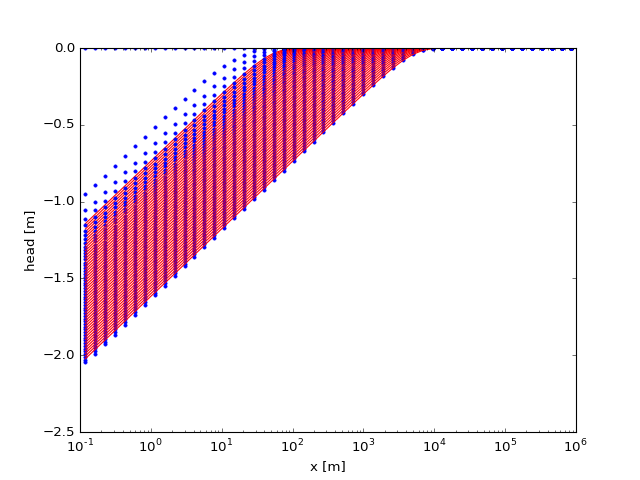

In [16]:
# Extract the heads
plt.figure()
plt.setp(plt.gca(), 'xlabel','x [m]', 'ylabel', 'head [m]' , 'xscale', 'log')
for it in range(len(t)):
    plt.plot(gr.xm[gr.xm>0], Out.Phi[it][iy(0),gr.xm>0,-1], 'b.')
    plt.plot(gr.xm[gr.xm>0], fi[it][gr.xm>0], 'r')

As can be seen, the numerical and analyticl solutions agree. By changing the variable axial to False or True one can choose between a flat cross sectional model and an axisymmetrical model. The correct axis and analytical solutions will then be shown in the figure. The burden of changing variable for both cases is completely carried by the grid object and the way in which the conductances are computed in fdm3.

To show that the water balance matches we compute below the total flow into the model.

<IPython.core.display.Javascript object>


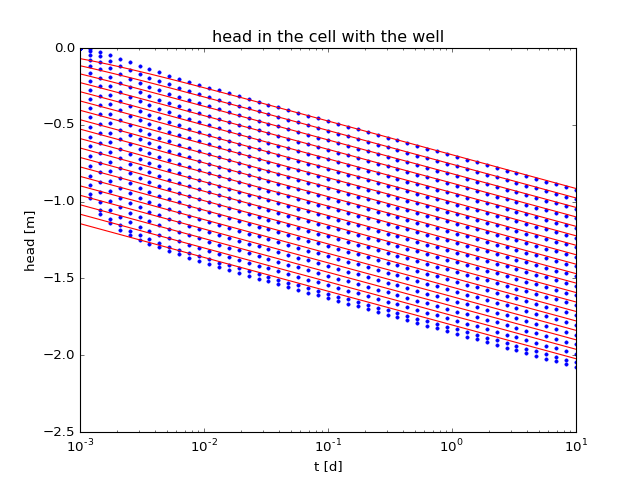

In [17]:
# plotting head versus time for a set of distances

plt.figure()
plt.setp(plt.gca(), 'xlabel', 't [d]', 'ylabel', 'head [m]', 'xscale','log')
plt.title('head in the cell with the well')

for iix in range(ix(0.0),ix(0.0)+20):
    plt.plot(t, Out.Phi[:,iy(0.0),iix,-1], 'b.')
    plt.plot(t, fi[:,iix], 'r')
    

Firstly, we observe that our large-scale model agrees well with the axisymmetric analytic solution.

Secondly, we see that it take the model a few steps to reach the analytic solution. We have discussed this in the previous example.

Thridly, it can be seen that the drawdown in the center of the model, that is the cell [50, 50] is too big relative to that of the analytial well. This is the case from the beginning of the simulation. It, therefore, has no relation with the size of the model. This extra drawdown is,obviously due to the the fact that we have specified the head in the center of the center cell so that the water first has to flow against the resistance within that cell, i.e. within the well, before it enters the aquifer. This, of course, is nog what we mean by a well. To get the head at the boundary of the well, in this case at the boundary of the center cell, we should give that cell a high conductivity.

We'll leave this as an exercise for the user.

Even after we have turned the center cell into a "real" well, there remains a minor difference between the analytical solution and the model. A small distance near the well is natural because the cell that assumes the task of the well is square while the analytical solution assumes a circular well. This shape issue is very local and should not influence deviations further from the well, because the extraction is the same in both the numerical and analytical solutions. Remember there are no fixed heads, only initial heads. We simply have to attribute these remaining minor differences to the discritization. Indeed if we refine our model by increasing Npoints above the difference between the model and the analytical sollution gets even smaller. So, indeed, these last differences are due to the chosen discritization.

One may also experiment with the parmeter `\epsilon`. one will see that the value 1.0 gives the most stable results, initially, with no differece after a few ininitial time steps.

### Water balance

The water balance should match at all times. There are two ways to check

The net inflow of the central cell should equal the extraction at all time steps.
The total flow relased form storage must also match the extraction at all time steps.


In [18]:
digits = 1

# average inflow well cell during each time step:
repr( [ round( Out.Q[idt,iy(0.0),ix(0.0),-1] , digits) for idt in range(len(np.diff(t))) ] )

'[-1199.8, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0, -1200.0]'

In [19]:
# Show the flow from storage during each time step:
repr( [round( np.sum(Out.Qs[idt]), digits ) for idt in range(len(np.diff(t)))] )

'[1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0, 1200.0]'

Hence the injection in the well-cell is indeed equal to $ Q=-1200 $ m3/d, and the same is true for the relase from storage, which adds 1200 m3/d to the model during every time step. The difference in the first time step of the iflow is due to the storage in the cell itself, which can be set to zero by setting Ss for that cell to zero, if desired.

### A well in a semi-confined aquifer (Hantush)

A second famous example for transient flow is that to a well in a semi-confined aquifer according to Hantush. The setup is similar to that of Theis with the only difference that water is also enetering the aquifer from an overlying confining bed. This leakage is proportional to the difference of the head maintained above the semi-confining unit and that in de pumped aquifer.

The sollution according to Hantush can be mathematically written as


$$ s = \frac Q {4 \pi kD} W_h(u, \frac r \lambda), \,\,\,\,  u = \frac {r^2 S} {4 kD t}, \,\,\, \lambda = \sqrt{kDc} $$

Where $W_u(-,-)$ is Hantush's well function, $kD$ [L2/T]transmissivity of the homogeneous aquifer and $c$ [T] the vertical hydraulic resistance of the homogeneous confining unit, $S$ the storage coefficient of the aquifer, $t$ [T] time, $r$ [m] distance to the center of the well, and $Q$ [L3/T] the constant extraction that starts at $t=0$.

The well fucntion can mathematically be written as

$$ W_h(u, \frac r \lambda) = \intop_u^\infty 
\frac {
   e^{-y - \frac 1 y  \left( \frac r {2 \lambda} \right)^2 }
   }
   y
   dt
$$

For $ t \rightarrow \infty $, we have $ u \rightarrow 0$, the steady state solution, to that because

$$ s(r,\infty) = \frac Q {2 \pi kD} K_0 \left( \frac r \lambda \right)
= \frac Q {4 \pi kD} W_h \left(0,\frac r \lambda \right)
= \frac Q {4 \pi kD} \intop_0^\infty  \frac  { e^{-y - \frac 1 y  \left( \frac r {2 \lambda} \right)^2 } } y dt
$$

So that
$$  \intop_0^\infty \frac  { e^{-y - \frac 1 y  \left( \frac r {2 \lambda} \right)^2 } } y dt 
= 2 K_0 \left( \frac r \lambda \right)
$$

Bruggeman (1999, p877) provides a somewhat different parameterization of the function, one that completely separates time from space, which are mixed in the Hantush form, because both $u$ and $r/\lambda$ contain the distance $r$ to the well. The form given by Bruggeman uses $ \tau = t/(cS)$  and $ \rho = r/\lambda $ instead. Both parameters are dimensionless. \tau is time relative to $cS$, a characteristic time for the aquifer system and $\rho$ is a distance relative to a characteristic distance $\lambda$ of the aquifer system.

$$ Wh(u,\rho) = Wb(\tau, \rho) = \intop_0^\tau \frac {e^{-y - \frac {\rho^2} {4 y}  } } y dy $$

We may now numerically integrate to zero and add half the bessel function.

In [20]:
def Wh(U, rho, npl=20, inf=1e2):
    """returns Hantush's well function
    
    The computation is done by integration from u to exp(umax)
    
    Parameters:
    -----------
    U : ndarray
        (r^2 S)/(4 kDt)
    rho: float
        r / lambda = r / sqrt(kD c)
    npl : int
        number of integration poins per ln cycle
    inf : float
        practical value for infinity as upper limit for integration
    
    Returns:
    --------
    Hantush's well function value
    
    TO 161024
    """
    import numpy as np
    
    linf = np.log10(inf)
    if isinstance(U, float):
        U = np.array([U])
    else:
        U = U.ravel()    
    wh = np.zeros((len(U),1))
    for it,u in enumerate(U):
        y = np.logspace(np.log10(u), linf,
                        int( (linf - np.log10(u))*npl+1) )
        arg = np.exp(-y - (0.25 * rho**2) / y) / y
        wh[it] = np.sum(0.5 * (arg[:-1] + arg[1:]) * np.diff(y))
    return wh

<IPython.core.display.Javascript object>


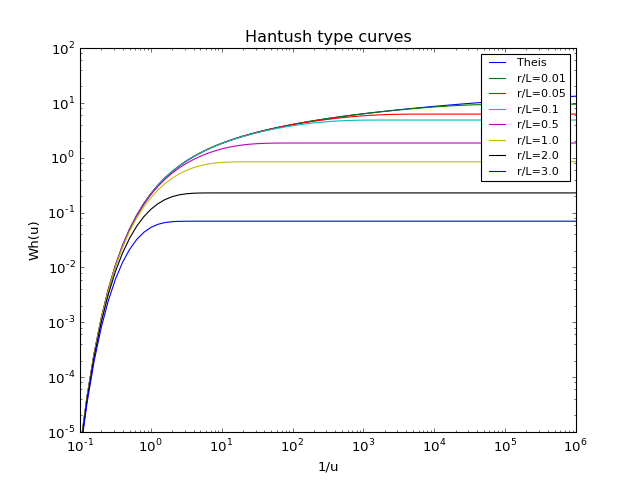

In [30]:
# Compute and show the Hantush type curves together with the Theis type curve
plt.figure()
plt.setp(plt.gca(), 'xscale','log', 'yscale','log',
         'xlabel', '1/u','ylabel','Wh(u)',
         'title', 'Hantush type curves',
         'ylim',(1e-5, 1e2), 'xlim', (0.1, 1e6))

# Values of r/L
Rho = [0.01, 0.05, 0.1, 0.5, 1., 2., 3.]

# values for U
U = 1/np.logspace(-1, 6, 71)

# Theis
plt.plot(1/U, -scipy.special.expi(-U), label='Theis')
# Hantush for each value of r/L
for ir, rho in enumerate(Rho):
    plt.plot(1/U, Wh(U,rho), label='r/L={0}'.format(rho))    
plt.legend(fontsize='small')


We will now try to reproduce these Hantush type curves with our 3D transient finite difference model and compare them with the analytical solution.

To produce the curves, we make sure that $\frac Q {4 \pi kD} = 1$. We also make sure that $1/u$ will vary from 0.1 to $10^6$. And we make sure that we produce curves for the same set of values for $r/\lambda$.

Running in axial mode, y-values are ignored.


<IPython.core.display.Javascript object>


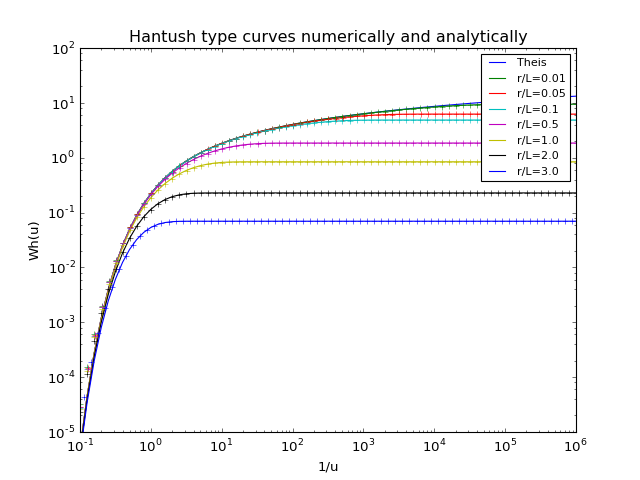

In [31]:
#aquifer
d =  10. # m, thickness of the confining unit
D =  10. # m, thickness of teh aquifer

c  = 250. # d, vertical hydraulic resistance of the confining unit
k0 = (0.5 * d)/c # m/d, water flows only through 05.*d of confining unit
k1 =  100. # m/d, horizontal hydraulic conductivity of the aquifer
kD = k1 * D # m2/d, transmissivity of aquifer
L  = np.sqrt(kD * c) # characteristic or spreading length of the semi-confind aquifer system

S = 0.001 # [-], storage coefficient of aquifer

Q = 4 * np.pi * kD # m3/d, extraction by well making sure Q/(4 pi kD) = 1

t = np.logspace(-12, 12, 241)  # 7 log cycles, should be enough

# coordinates
Rho = np.array([0.01, 0.05, 0.1, 0.5, 1., 2., 3.]) # desired r/L curves
rm  = Rho * L  # distances to extract drawdowns from to get dedired r/L curves

r0 = 0.2 # m, radius of the well
z0 = 0 # m, ground elevation, top of confining unit
z = z0 - np.array([0, d, d+D])
y = np.array([-0.5, 0.5])  # m, a one m thick model (ignored when axially symmetric)
x = np.hstack((rm-0.1, rm+0.1 ,1.01*r0, np.logspace(np.log10(r0), np.log10(5 * L), 151)))
# added rm-0.1 and rm+0.1 to have gr.xm points exactly on rm for extraction of heads

gr = mfgrid.Grid(x, y, z, axial=True)

# System arrays
K  = gr.const(np.array([k0, k1]))
Kz = gr.const(np.array([k0, 1e3 * k1])) # no vertical resistance in the aquifer
Ss = gr.const(S/D)
FQ = gr.const(0.);  FQ[0,0,-1] = Q
FH = gr.const(0.)
IBOUND = gr.const(1)
IBOUND[:,:,0] = -1  # heads in confining unit are fixed for Hantush

# run model
Out = fdm_t.fdm3t(gr, t, K, K, Kz, Ss, FQ, FH, IBOUND)

# indices for gr.xm == rm
Ix = np.array( np.interp(rm,gr.x,np.arange(gr.Nx+1)), dtype=int)

# visualize
plt.figure()
plt.setp(plt.gca(),'xscale','log','yscale','log',
         'xlabel','1/u','ylabel','Wh(u)',
         'ylim',(1e-5, 1e2),'xlim', (1e-1, 1e6),
         'title', 'Hantush type curves numerically and analytically')

# Theis
plt.plot(1/U, W(U), label='Theis')

# Hantush
for ir, rho in enumerate(Rho):
    # Hantush analytic
    plt.plot(1/U, Wh(U,rho), label='r/L={0}'.format(rho))
    
for ir, rho in enumerate(Rho):
    # Hantush numeric
    u = (rm[ir]**2 * S) / (4 * kD * t)
    plt.plot(1/u, Out.Phi[:, 0, Ix[ir], -1], '+') #, label='r/L={0}'.format(rho))

plt.legend(fontsize='small')

The numerical and analytical solutions agree except for the last two lines, the ones for $ r\lambda $ is 5 and 6. There is no obvious reason for that. It needs some detailed study to find out. The analytically computed type curves are correct as can be verified on the graph of these type curves in Kruseman and De Ridder.

## Excercises

### Compute / show delayed yield

Delayed yield may result from the drawdown occuring above the aquitard, caused by downward leakage through the aquitard as a consequence of pumping in the underlying aquifer. It also results from the combination of elastic storage and water-table storage in the same unconfined aquifer. Initially the drawdown is due to elastic storage, which spreads fast. Slowly then, the water table dradown will take over and finally determine the drawdown. As a consequence the effect of this water-table drawdown becomes visible only after that of elastic storage.

The combined drawdown curve shows two theis-curves in series, the first one is determined by the elastic storage, the second one by the water table storage. In Python this can readily be modeled by giving all cells a small elastic specific storage as was done in the previous examples, and only give the top layer cells a larger one that matches the specific yield. Then compute the time-drawdown curve and compare it with the two Theis curves.

### Compute well-bore storage (Boulton)

The storage inside the well reduces the drawdown shortly after the start of the pump. This effect was analytically analyzed by Boulton (1963) and later by Neuman (1971). It may be implemented numerically in axially symmetric mode by modeling the water inside the well casing explicitly. To to this, a thin column may be given a zero horizontal conductivity to represent the impervious well casing. Then the top cell inside the casing is given a storage coefficient equal to 1. To represent the free water level inside the screen and the casing, use a large vertical conductivity. The extraction may then be from any of the cells inside the screen or the casing. The large vertical conductivity inside the well makes sure the head is the same throughout the well screen and casing. The result should be compared with the analytical solution given by Boulton. A practical manner is comparing it with curves for Boulton in Pumping Test Books (e.g. Kruzeman & De Ridder, 1970, 1995)

The figure gives an example of a large open well in India.

![Large open well](./pictures/LageDiameterWellNRC.png)


## Conclusion

We now have a flexible 3D transient finite difference model which can be used to solve fully 3D transient problems, whereby one can easily switch between regular mode and axially symmetric model.

The model was verified using the analytical solutions of Theis and Hantush. The Theis solution was verified both by an axially symmetric model as by a large flat model.

Last part to consider is particle tracking.